# load data & library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
train = pd.read_csv("benz/train.csv", index_col="ID")
test = pd.read_csv("benz/test.csv", index_col="ID")
submission = pd.read_csv("benz/sample_submission.csv", index_col="ID")

train.shape, test.shape, submission.shape

((4209, 377), (4209, 376), (4209, 1))

In [9]:
train["y"].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

<AxesSubplot:xlabel='ID', ylabel='y'>

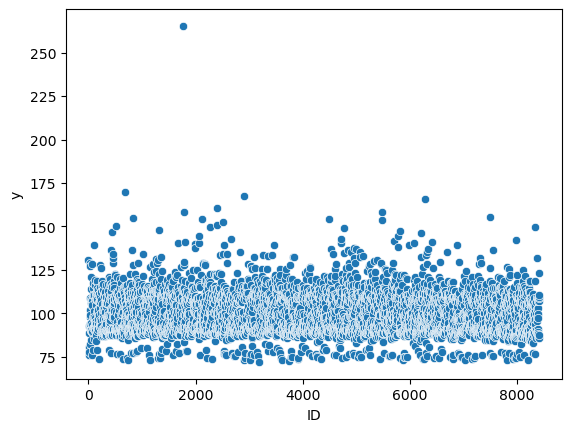

In [10]:
# 이상치 확인
# 회귀 모델은 이상치에 매우 민감
sns.scatterplot(data=train, x=train.index, y="y")

In [11]:
train[train["y"] > 200]

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1770,265.32,y,r,ai,f,d,ag,l,t,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# 이상치 제거
train = train[train["y"] < 200].copy()
train.shape

(4208, 377)

# One-Hot-Encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
train_ohe = ohe.fit_transform(train.drop(columns="y"))
test_ohe = ohe.transform(test)

train_ohe.shape, test_ohe.shape

((4208, 919), (4209, 919))

# X, y split

In [14]:
X = train_ohe
y = train["y"]

X.shape, y.shape

((4208, 919), (4208,))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3787, 919), (421, 919), (3787,), (421,))

In [18]:
X_test = test_ohe
X_test.shape

(4209, 919)

# Gradient Boosting Machine

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbt = GradientBoostingRegressor(random_state=42)
model_gbt

GradientBoostingRegressor(random_state=42)

In [22]:
model_gbt.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [28]:
gbt_score = model_gbt.score(X_valid, y_valid)
gbt_score

0.5318131789650844

In [26]:
y_predict = model_gbt.predict(X_test)
y_predict

array([ 97.7006501 , 110.86444205,  95.4218578 , ...,  94.08588183,
       110.36522697,  91.73853667])

# 제출

In [25]:
submission

,y
ID,
1,100.669318
2,100.669318
3,100.669318
4,100.669318
5,100.669318
...,...
8410,100.669318
8411,100.669318
8413,100.669318


In [27]:
submission["y"] = y_predict

In [31]:
file_name = f"benz/submission_{gbt_score:.5f}.csv"
file_name

'benz/submission_0.53181.csv'

In [44]:
submission.to_csv(file_name)

In [45]:
pd.read_csv(file_name)

,ID,y
0,1,97.700650
1,2,110.864442
2,3,95.421858
3,4,79.927743
4,5,112.300994
...,...,...
4204,8410,102.175566
4205,8411,92.729782
4206,8413,94.085882
4207,8414,110.365227


In [48]:
from sklearn.ensemble import ExtraTreesRegressor

model_et = ExtraTreesRegressor(random_state=42, n_estimators=10)
model_et

ExtraTreesRegressor(n_estimators=10, random_state=42)

In [49]:
model_et.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=10, random_state=42)

In [53]:
et_score = model_et.score(X_valid, y_valid)
et_score

0.2047395598878936

In [54]:
y_predict_et = model_et.predict(X_test)
y_predict_et[:10]

array([ 77.764 , 130.81  ,  77.7935,  79.97  , 106.258 ,  95.814 ,
       107.08  ,  89.38  , 119.625 ,  90.083 ])

In [55]:
submission["y"] = y_predict_et

In [56]:
file_name = f"benz/submission_{et_score: .5f}.csv"

submission.to_csv(file_name)
pd.read_csv(file_name)

,ID,y
0,1,77.7640
1,2,130.8100
2,3,77.7935
3,4,79.9700
4,5,106.2580
...,...,...
4204,8410,103.0300
4205,8411,87.6800
4206,8413,100.0800
4207,8414,105.1000
